<a href="https://colab.research.google.com/github/qa21336/HousingStatisticsAnalysis-/blob/main/Merged_Data_Feature_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluating each Features ability to predict Housing Affordability

Open the dataset

In [3]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/ADS Datasets/mergedDataV1.1.csv")

df = df.drop("Unnamed: 0", axis=1)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,year,mortgage_rate,country,affordability,population,avg_inflation_rate,SalesVolume,NewSalesVolume,OldSalesVolume
0,2001.0,72.616667,E,4.50,49449746,1.233333,1074.957335,101.729042,973.228293
1,2001.0,72.616667,W,3.33,2910232,1.233333,425.760870,45.065217,380.695652
2,2002.0,72.641667,E,5.12,49679267,1.258333,1163.332585,109.523952,1053.808633
3,2002.0,72.641667,W,3.71,2922876,1.258333,478.956522,46.978261,431.978261
4,2003.0,72.775000,E,5.93,49925517,1.358333,1079.811377,106.550399,973.260978


Find statistics about correlations of features with price-to-earnings + linear regression with features individually.

In [26]:
import numpy as np
from sklearn.feature_selection import r_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

countries = np.unique(df["country"])
for country in countries:
    print("Country: "+country)
    # Get labels for country
    countryDf = df.loc[df["country"] == country]
    affordData = np.array(countryDf["affordability"])

    # Plot all scatters
    for col in df.columns:
        if(col == "affordability" or col == "country"):
            continue

        colData = np.array(countryDf[col]).reshape(-1, 1)

        lr = LinearRegression()
        scores = cross_val_score(lr,
                                colData,
                                affordData,
                                cv=20,
                                scoring="neg_mean_squared_error")

        print("Feature: "+col)
        print("Pearsons correlation coefficent: "+str(r_regression(colData, affordData)[0]))
        print("Average linear regression CV MSE: "+str(-1 * np.mean(scores)))
        print()
    print()

Country: E
Feature: year
Pearsons correlation coefficent: 0.8553401414284783
Average linear regression CV MSE: 0.2752052011630581

Feature: mortgage_rate
Pearsons correlation coefficent: 0.5110525791060611
Average linear regression CV MSE: 0.6709708002536596

Feature: population
Pearsons correlation coefficent: 0.8368203319497978
Average linear regression CV MSE: 0.3038848192035438

Feature: avg_inflation_rate
Pearsons correlation coefficent: 0.06205205379801624
Average linear regression CV MSE: 0.9379387267978654

Feature: SalesVolume
Pearsons correlation coefficent: -0.42207634999502863
Average linear regression CV MSE: 0.8093532549279605

Feature: NewSalesVolume
Pearsons correlation coefficent: -0.17696598181290787
Average linear regression CV MSE: 0.9094451266314854

Feature: OldSalesVolume
Pearsons correlation coefficent: -0.4425469435232071
Average linear regression CV MSE: 0.7966579447969782


Country: W
Feature: year
Pearsons correlation coefficent: 0.5134058228280195
Average l

Linear model with all features together

In [5]:
lms = []
for country in countries:
    countryData = df.loc[df["country"] == country].drop("country", axis=1)
    countryYs = countryData.pop("affordability")
    countryXs = countryData

    lm = LinearRegression().fit(countryXs, countryYs)
    lms.append(lm)
    print(country+", r^2: "+str(lm.score(countryXs, countryYs)))

E, r^2: 0.9591373535363215
W, r^2: 0.7143604208625391


Do some plots (everything other than indep. variable is the mean)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

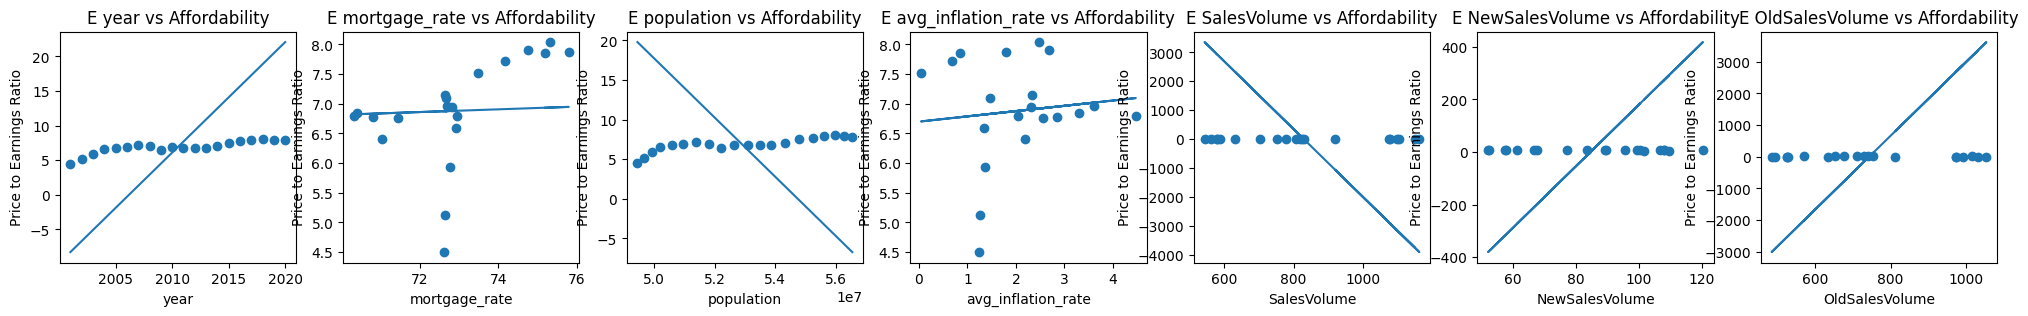

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

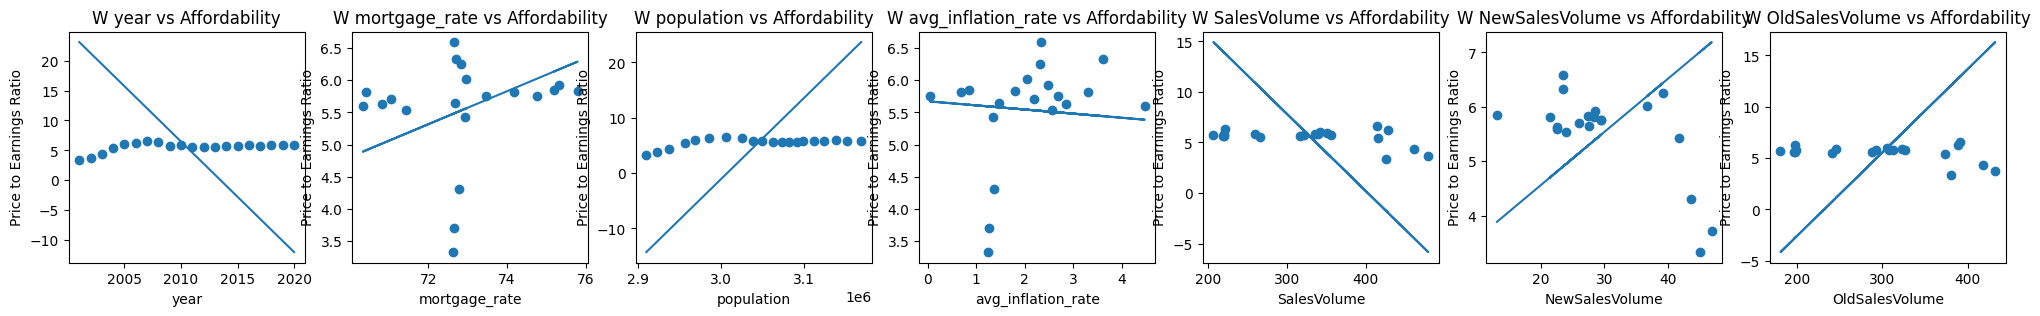

In [25]:
import matplotlib.pyplot as plt

for i, country in enumerate(countries):
    fig, axes = plt.subplots(1, 7, figsize=(25, 3))

    # Get labels for country
    countryDf = (df.loc[df["country"] == country]).drop("country", axis=1)
    affordData = countryDf.pop("affordability")

    # Means
    means = np.mean(countryDf, axis=0)

    # Plot all scatters
    for j, col in enumerate(countryDf.columns):
        colData = np.array(countryDf[col]).reshape(-1, 1)

        # Model predictions
        x = np.tile(means, (len(countryDf), 1))
        x[:, j] = colData.reshape(-1,)
        preds = lms[i].predict(x)

        # Plot
        axes[j].scatter(colData, affordData)
        axes[j].set_title(country+" "+col+" vs Affordability")
        axes[j].set_xlabel(col)
        axes[j].set_ylabel("Price to Earnings Ratio")
        axes[j].plot(colData, preds)
    plt.show()



Plots but all variables vary over time

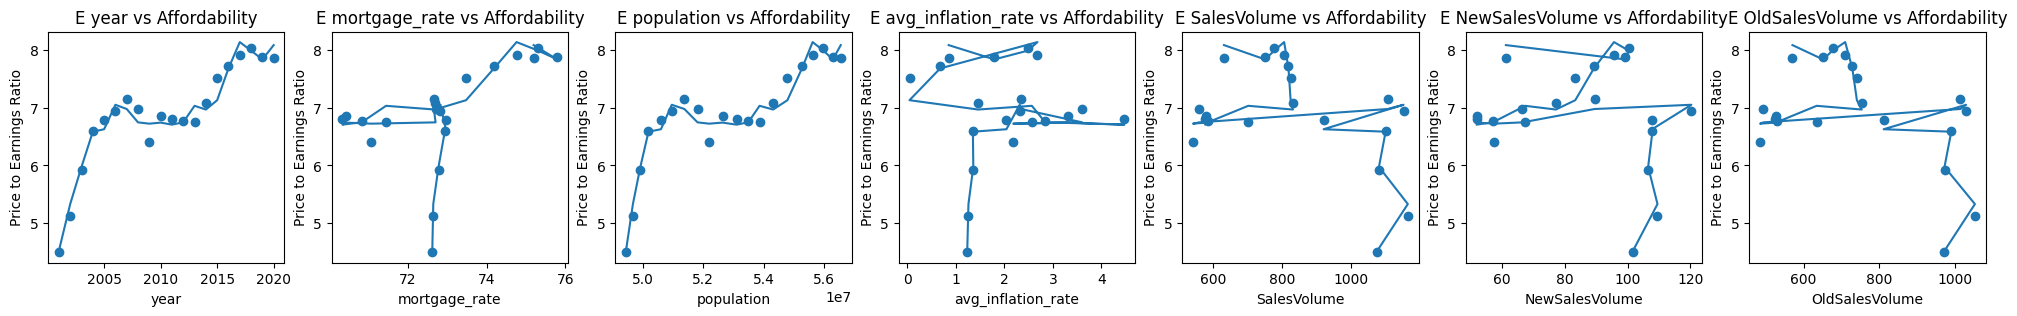

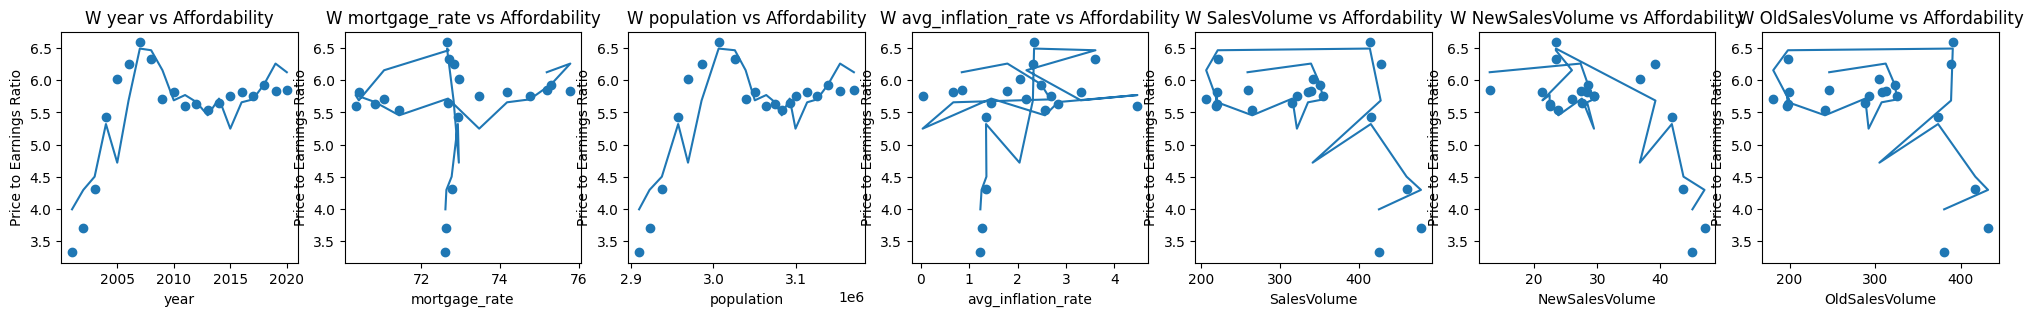

In [24]:
for i, country in enumerate(countries):
    fig, axes = plt.subplots(1, 7, figsize=(25, 3))

    # Get labels for country
    countryDf = (df.loc[df["country"] == country]).drop("country", axis=1)
    affordData = countryDf.pop("affordability")

    # Model predictions
    preds = lms[i].predict(countryDf)

    # Plot all scatters
    for j, col in enumerate(countryDf.columns):
        colData = np.array(countryDf[col]).reshape(-1, 1)

        # Plot
        axes[j].scatter(colData, affordData)
        axes[j].set_title(country+" "+col+" vs Affordability")
        axes[j].set_xlabel(col)
        axes[j].set_ylabel("Price to Earnings Ratio")
        axes[j].plot(colData, preds)
    plt.show()



LOBF Plots

E


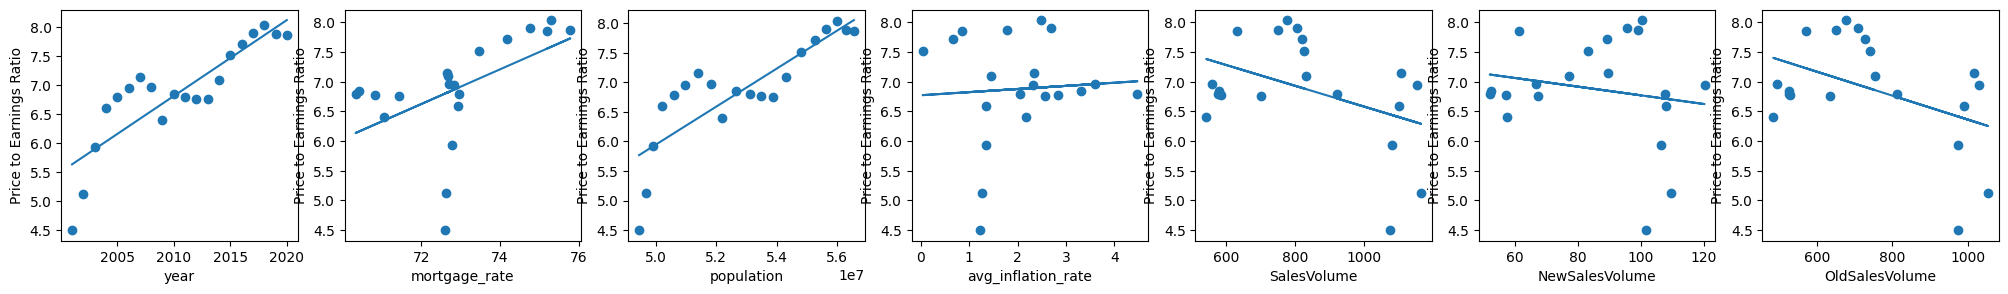

W


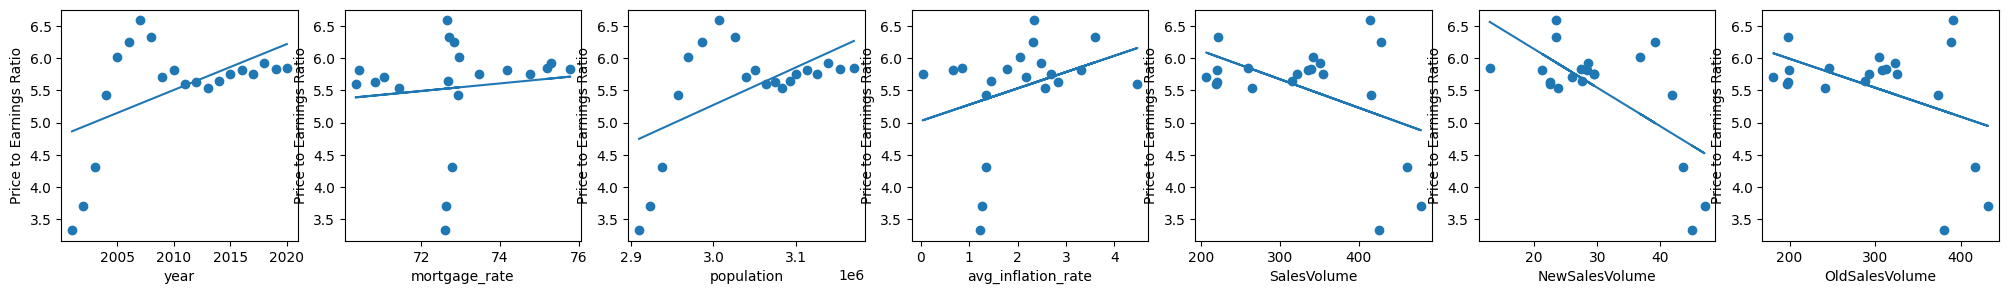

In [17]:
for i, country in enumerate(countries):
    fig, axes = plt.subplots(1, 7, figsize=(25, 3))

    # Get labels for country
    countryDf = (df.loc[df["country"] == country]).drop("country", axis=1)
    affordData = countryDf.pop("affordability")

    print(country)

    # Plot all scatters
    for j, col in enumerate(countryDf.columns):
        colData = np.array(countryDf[col])

        # Get LOBF
        a, b = np.polyfit(colData, affordData, 1)

        # Plot
        axes[j].scatter(colData, affordData)
        axes[j].set_xlabel(col)
        axes[j].set_ylabel("Price to Earnings Ratio")
        axes[j].plot(colData, (a*colData) + b)
    plt.show()

Linear model predictions over time

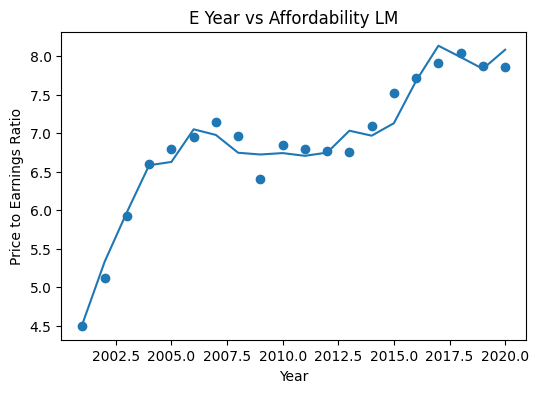

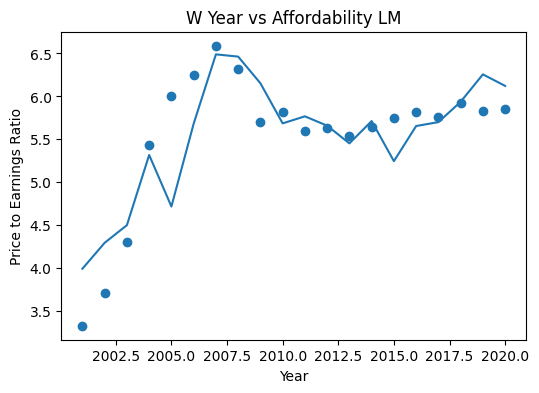

In [23]:
for i, country in enumerate(countries):
    fig, axes = plt.subplots(figsize=(6, 4))

    # Get labels for country
    countryDf = (df.loc[df["country"] == country]).drop("country", axis=1)
    affordData = countryDf.pop("affordability")

    # Model predictions
    preds = lms[i].predict(countryDf)

    # Plot all scatters
    colData = np.array(countryDf["year"]).reshape(-1, 1)

    # Plot
    axes.scatter(colData, affordData)
    axes.set_title(country+" Year vs Affordability LM")
    axes.set_xlabel("Year")
    axes.set_ylabel("Price to Earnings Ratio")
    axes.plot(colData, preds)
    plt.show()

### LASSO Regression with CV to choose alpha

In [41]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

lassoModels = []
lassoXScalers = []
lassoYScalers = []
for country in countries:
    # Get Data for Country
    countryData = df.loc[df["country"] == country].drop("country", axis=1)
    countryYs = countryData.pop("affordability")
    countryXs = countryData

    # Scale and log scalers
    xScaler = MinMaxScaler().fit(countryXs)
    yScaler = MinMaxScaler().fit(np.array(countryYs).reshape(-1, 1))
    scaledXs = xScaler.transform(countryXs)
    scaledYs = yScaler.transform(np.array(countryYs).reshape(-1, 1))
    lassoXScalers.append(xScaler)
    lassoYScalers.append(yScaler)

    # Do CV to find best alpha
    params = {"alpha": [0.001, 0.01, 0.1, 0.5, 1]}
    lasso = Lasso()
    lassoCV = GridSearchCV(lasso, params, cv=len(scaledXs), scoring="neg_mean_squared_error")
    lassoCV.fit(scaledXs, scaledYs)

    bestLasso = lassoCV.best_estimator_
    lassoModels.append(lassoCV.best_estimator_)

    # Logging
    print(country)
    print("r^2: "+str(bestLasso.score(scaledXs, scaledYs)))
    print(list(countryData.columns))
    print("Coefficents: "+str(bestLasso.coef_))
    print("Alpha: "+str(lassoCV.best_params_))
    print()

E
r^2: 0.7862053587187288
['year', 'mortgage_rate', 'population', 'avg_inflation_rate', 'SalesVolume', 'NewSalesVolume', 'OldSalesVolume']
Coefficents: [ 7.50574723e-01  2.39372373e-02 -0.00000000e+00  1.94100932e-01
  1.05312256e-05  1.68566017e-01  0.00000000e+00]
Alpha: {'alpha': 0.001}

W
r^2: 0.4308474946670756
['year', 'mortgage_rate', 'population', 'avg_inflation_rate', 'SalesVolume', 'NewSalesVolume', 'OldSalesVolume']
Coefficents: [ 0.          0.          0.04641058  0.         -0.         -0.44126314
 -0.        ]
Alpha: {'alpha': 0.01}



Plot LASSO

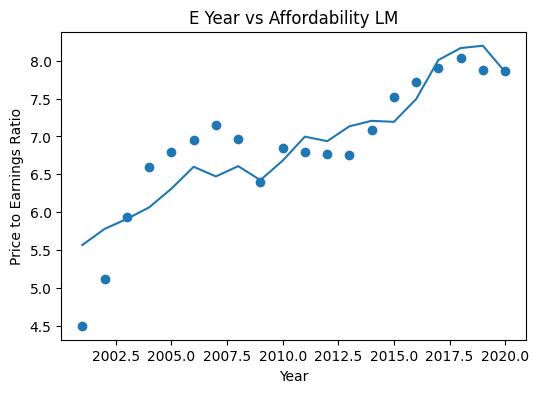

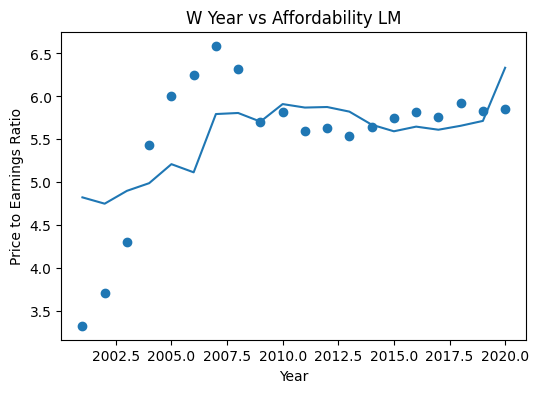

In [45]:
for i, country in enumerate(countries):
    fig, axes = plt.subplots(figsize=(6, 4))

    # Get labels for country
    countryDf = (df.loc[df["country"] == country]).drop("country", axis=1)
    affordData = countryDf.pop("affordability")

    # Model predictions
    scaledXs = lassoXScalers[i].transform(countryDf)
    scaledPreds = lassoModels[i].predict(scaledXs)
    preds = lassoYScalers[i].inverse_transform(scaledPreds.reshape(-1, 1))

    # Plot all scatters
    colData = np.array(countryDf["year"]).reshape(-1, 1)

    # Plot
    axes.scatter(colData, affordData)
    axes.set_title(country+" Year vs Affordability LM")
    axes.set_xlabel("Year")
    axes.set_ylabel("Price to Earnings Ratio")
    axes.plot(colData, preds)
    plt.show()